In [4]:
# Import des librairies
import pandas as pd  # pandas 
import numpy as np
import matplotlib.pyplot as plt # Pour les graphiques
import seaborn as sns # seconde librairie de visualisation
# This is to test results
from test_helper import Test

# TP DATASCIENCE -- INTRODUCTION <a class="tocSkip">

Les données que nous allons utiliser ici sont des données en provenance du site [gapminder](https://www.gapminder.org/), qui regorge de données socio-économiques sur l'évolution de la société humaine. Ce site a été créé par Hans Rosling, l'auteur du livre [Factfulness](https://www.amazon.fr/Factfulness-Hans-Rosling/dp/2081427117)

*Une question préliminaire au passage : quelle est l'espérance de vie de la population **mondiale** en 2019 ?*

- A.   50 years
- B.   60 years
- C.   70 years

Vous devriez pouvoir y répondre à partir des données de ce TP ; faites le... 

Le début du TP s'inspire d'un [projet datacamp](https://campus.datacamp.com/courses/cleaning-data-in-python/case-study-5). 

Lors de ce TP, nous aborderons les points suivants :

- lecture d'un fichier csv
- types des données, comptage, suppression des NA
- scatterplots
- tidyfication
- rassemblement de plusieurs tables (concatenation)
- histogrammes
- regroupements (groupby)
- concatenations de tables suivant une ou plusieurs colonnes
- creations de nouvelles variables
- analyse des correlations

## Lecture des données et première exploration

**Question 1.1** :  Lire le fichier `g1800s.csv`  et stocker le résultat dans une variable g800s. Vous utiliserez pour cela la méthode `read_csv` de pandas, cf [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/io.html). N'oubliez pas de préfixer par pd. 

In [5]:
g1800s = pd.read_csv('g1800s.csv', index_col=0)
g1800s

g1800s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 0 to 259
Columns: 101 entries, Life expectancy to 1899
dtypes: float64(100), object(1)
memory usage: 207.2+ KB


In [6]:
g1800s.head()

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,27.29,27.28,27.27,27.26,27.25,27.24,27.23,27.22,27.21,27.20
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82


**Question 1.2** : Explorez quelles sont les caractéristiques de la table : nombre de données, dimensions, types des données. méthodes `.info`, `.describe`, `.dtypes`, attibut `.shape` 

In [264]:
g1800s.shape

(260, 101)

In [265]:
g1800s.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,31.486020,31.448905,31.463483,31.377413,31.446318,31.562537,31.615970,31.573134,31.376766,31.310448,...,32.291045,32.475373,32.478408,32.533085,32.747214,32.811841,32.895224,32.964279,32.994080,32.962985
std,3.763585,3.755739,3.878204,3.901966,3.877156,3.947957,4.039261,3.917339,4.017228,3.972970,...,5.907298,5.734794,5.825318,6.018269,5.822354,6.067020,6.344388,6.390669,6.336805,6.325265
min,23.390000,23.390000,23.390000,19.600000,23.390000,23.390000,23.390000,23.390000,12.480000,13.430000,...,4.000000,8.000000,14.000000,8.000000,22.180000,22.000000,20.000000,19.000000,19.700000,18.900000
25%,29.000000,28.950000,28.900000,28.900000,28.950000,29.000000,29.000000,29.000000,28.950000,28.820000,...,29.200000,29.200000,29.000000,29.000000,29.200000,29.200000,29.000000,29.200000,29.160000,29.000000
50%,31.800000,31.700000,31.600000,31.500000,31.600000,31.700000,31.800000,31.800000,31.600000,31.500000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
75%,33.900000,33.900000,33.900000,33.800000,33.870000,33.900000,34.000000,34.000000,33.870000,33.800000,...,35.000000,35.100000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.180000,35.180000
max,42.850000,40.300000,44.370000,44.840000,42.830000,44.270000,45.820000,43.560000,43.550000,41.740000,...,50.480000,51.090000,52.730000,52.580000,52.100000,54.160000,53.840000,54.140000,54.690000,51.620000


In [ ]:
Nombre_de_lignes = ## FILL HERE ##
Nombre_de_colonnes = ## FILL HERE ##
Type_de_la_variable_1803 = ## FILL HERE ## #choisir entre float, string, object, int
Nombre_de_variables_quantitatives = ## FILL HERE ##

In [7]:
Nombre_de_lignes = 260
Nombre_de_colonnes = 101
Type_de_la_variable_1803 =  float #choisir entre float, string, object, int
Nombre_de_variables_qualitatives = 1

In [8]:
Test.assertEqualsHashed(Nombre_de_lignes, '09d66f6e5482d9b0ba91815c350fd9af3770819b')
Test.assertEqualsHashed(Nombre_de_colonnes,'dbc0f004854457f59fb16ab863a3a1722cef553f')
Test.assertEqualsHashed(Type_de_la_variable_1803,'1c737bef1c20a191fa97fbb9558e4f5cc67ac29d')
Test.assertEqualsHashed(Nombre_de_variables_qualitatives, '356a192b7913b04c54574d18c28d46e6395428ab')

1 test passed.
1 test passed.
1 test passed.
1 test passed.


**Question 1.3** : Evaluer quel est le nombre de données manquantes, et le pourcentage par rapport à l'ensemble des données. Utiliser par exemple `.isna()` et `.sum()` 

In [ ]:
Nb_donnees_manquantes = ## FILL HERE ##
Nombre_données_totales = ## FILL HERE ##
Pourcentage_donnees_manquantes = ## FILL HERE ##

In [9]:
Nb_donnees_manquantes = g1800s.isna().sum().sum()
Nombre_données_totales = np.prod(g1800s.shape)
Pourcentage_donnees_manquantes = Nb_donnees_manquantes/Nombre_données_totales

In [10]:
Test.assertEqualsHashed(Nb_donnees_manquantes,'ac4b9fd6ca17edb1289166db48b253122f81911c')
Test.assertTrue(np.isclose(Pourcentage_donnees_manquantes, 0.22, rtol=10))

1 test passed.
1 test passed.


**Question 1.4** : En utilisant la méthode `.plot()` des objets pandas, avec les paramètres adéquats, tracez le nuage de points liant les colonnes `1800` et `1899`. Remplacez les '_____' . Evaluez la pente de la droite qui semble se dessiner. Que peut-on en conclure quant au lien entre les espérances de vies à ces deux années et son évolution dans le temps ? Comment interpréter le fait que le nuage semble dissymétrique autour de cette droite ?

Vous pouvez aussi utiliser la fonction `scatterplot` de la bibliothèque seaborn pour produite ce graphique. 

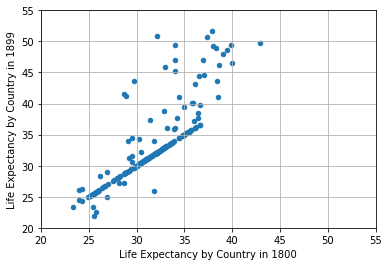

In [13]:
# Create the scatter plot
g1800s.plot(kind='scatter', x='1800', y='1899')

# Specify axis labels
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)

# Display the plot

plt.grid()

In [ ]:
# scatter plot
g1800s.____(kind='____', x='____', y='_____')

# Labels des axes
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Limites des axes
plt.xlim(20, 55)
plt.ylim(20, 55)

# show
plt.show()


Avec la librairie seaborn

In [ ]:
sns.scatterplot(data=____, x='_____', y='_____')

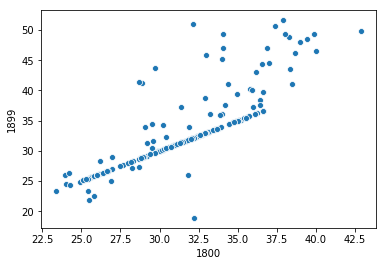

In [43]:
sns.scatterplot(data=g1800s, x='1800', y='1899')

Utiliser la méthode `lmplot` de seaborn afin de visualiser la tendance linéaire dans les données. Que penser du fait que la droite identifiée n'a pas la même pente que celle qui semblait se dégager des observations , 

/usr/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


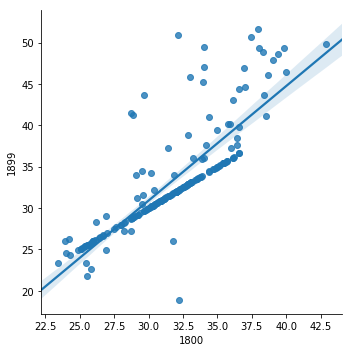

In [278]:
sns.lmplot(data=g1800s, x='1800', y='1899')

**Question 1.5** : Qualité des données :

1. vérifier que toutes les données numériques sont non négatives (ce sont des espérances de vie) 
    > Hint: 
    - (1) retirer toutes les lignes où une valeur manquante est présente, méthode `.dropna()`, 
    - (2) tester si toutes les valeurs numériques sont >=0 
    - (3) utiliser la méthode `.all()` (2 fois) pour tester que tous les résultats de tests sont True
- vérifier que tous les pays ne sont mentionnés qu'une seule fois (pas de lignes dupliquées ou d'enregistrements redondants) Hint: utiliser `.value_counts()` et vérifier que toutes les valeurs sont inférieurs ou égales à 1


In [ ]:
# 1.5.1
(g1800s.___().loc[___,___] >= 0).all().all()

In [6]:
# 1
(g1800s.dropna().loc[:, '1800':] >= 0).all().all()

True

In [44]:
#2 
assert g1800s['Life expectancy'].value_counts().max() == 1

## Combiner des tables

On dispose en fait des tables pour les années 1900 et 2000, sous la forme de fichiers csv  

- Charger les tables correspondantes dans des variabes `g1900s`  et `g2000s`,
- visualiser leurs caractéristiques
- concaténer ces tables suivant les lignes, sous la forme d'une nouvelle table `gapminder` 

NB - Dans le cas où les tables présenteraient une colonne `'Unnamed: 0'`, vous pourrez utiliser la méthode `.drop()` pour supprimer cette colonne

**Question 2.1** : Charger les tables

In [ ]:
g1900s = pd.read_csv("_____", index_col=___)
g2000s = ## FILL HERE ##

In [14]:
g1900s = pd.read_csv("g1900s.csv", index_col=0)
g2000s = pd.read_csv("g2000s.csv", index_col=0)

In [281]:
Test.assertEqualsHashed(g2000s.shape, '49da83f987771e963a9de18b32aa3f511826cb4e')

1 test passed.


In [ ]:
# Si lecture sans indiquer l'index supprimer une colonne
g1900s = pd.read_csv("g1900s.csv")
g1900s.columns

In [57]:
g1900s.drop('____', axis=__, inplace=____)

In [ ]:
# Si lecture sans indiquer l'index, le read_csv supprimer une colonne
g1900s = pd.read_csv("g1900s.csv")
g1900s.drop('Unnamed: 0', axis=1, inplace=True)

**Question 2.2** : Caractéristiques

In [15]:
g1900s.shape

(260, 101)

In [16]:
g2000s.shape

(260, 18)

In [15]:
g2000s.columns

Index(['Life expectancy', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016'],
      dtype='object')

**Question 2.3** : Concaténation

Afin de combiner les données des différents siècles, nous allons concaténer les tables suivant l'axe des lignes. 

In [ ]:
# Concatenate the DataFrames row-wise
gapminder = pd.concat([g1800s, g1900s, g2000s], axis=___, sort=_____)

In [17]:
# Concatenate the DataFrames row-wise
gapminder = pd.concat([g1800s, g1900s, g2000s], axis=0, sort=False)

In [285]:
Test.assertEqualsHashed(gapminder.shape,'ee9567b18125973f9a1dde274f5686927412c634')

1 test passed.


- Afficher la taille et les premières lignes de `gapminder` 

In [18]:
print(gapminder.shape)

print(gapminder.head())

(780, 218)
         Life expectancy   1800   1801   1802   1803   1804   1805   1806  \
0               Abkhazia    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1            Afghanistan  28.21  28.20  28.19  28.18  28.17  28.16  28.15   
2  Akrotiri and Dhekelia    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3                Albania  35.40  35.40  35.40  35.40  35.40  35.40  35.40   
4                Algeria  28.82  28.82  28.82  28.82  28.82  28.82  28.82   

    1807   1808  ...  2007  2008  2009  2010  2011  2012  2013  2014  2015  \
0    NaN    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1  28.14  28.13  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2    NaN    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3  35.40  35.40  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  28.82  28.82  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2016  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN

In [32]:
gapminder.columns

Index(['Life expectancy', '1800', '1801', '1802', '1803', '1804', '1805',
       '1806', '1807', '1808',
       ...
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016'],
      dtype='object', length=218)

## Tidyfication

Le format n'est pas "tidy", car l'année est certainement une variable intéressante. Il nous faudrait probablement une table dont les colonnes seraient le pays ('country'), l'année ('year') et la variable d'intérêt ('life_expectancy'). Il nous faut donc remettre en forme cette table en un vrai "dataframe", avec un index unique, des exemples suivant les lignes et les variables suivant les colonnes. 

**Question 3.1** : Pour cela, la méthode `melt` de pandas, que vous appellerez avec `pd.melt(___)` permet de réorganiser la table. voir l'aide de [melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html)

In [ ]:
# Entrer les paramètres 
gapminder_melt = pd.melt(frame=____, id_vars=___)
gapminder_melt.head()

In [ ]:
gapminder_melt.columns = ____    # Renommer les colonnes,
gapminder_melt.head()

In [19]:

# Melt gapminder: gapminder_melt
gapminder_melt = pd.melt(frame = gapminder, id_vars='Life expectancy')

# Rename the columns
gapminder_melt.columns = ['country', 'year','life_expectancy']

# Print the head of gapminder_melt
print(gapminder_melt.head())

                 country  year  life_expectancy
0               Abkhazia  1800              NaN
1            Afghanistan  1800            28.21
2  Akrotiri and Dhekelia  1800              NaN
3                Albania  1800            35.40
4                Algeria  1800            28.82


In [294]:
Test.assertEquals(gapminder_melt.loc[4, 'life_expectancy'], 28.82)

1 test passed.


- Renommons `gapminder_melt` en `gapminder` 

In [296]:
gapminder = gapminder_melt

- Afficher les types de `gapminder`. 

In [45]:
gapminder.dtypes

country             object
year                 int64
life_expectancy    float64
dtype: object

**Question 3.2** : Le type associé à `year` n'est pas entier. Convertissez le à un entier en utilisant la méthode `to_numeric` de pandas, ou `astype`

In [297]:
gapminder.year = gapminder.year.astype(np.int64)
# ou
gapminder.year = pd.to_numeric(gapminder.year)

In [298]:
Test.assertEqualsHashed(gapminder.country.dtype, '1615307cc4523f183e777df67f168c86908e8007')
Test.assertEqualsHashed(gapminder.year.dtype, '3cf12f96228a3fa41a25040bdcc6eac3659e7844')

1 test passed.
1 test passed.


**Question 3.3 (optionnelle)** Parfois les chaînes de caractères contiennent des caractères interdits, ou que l'on souhaite éviter afin de garantir un portabilité. Cette question vou smontre comment repérer des tels cas de figure. Elle utilise la notion d'expression régulière. Pour ceux qui ne connaissent pas, vous êtes invités à vous référer à l'excellent [Kit de survie Python](https://perso.esiee.fr/~bercherj/EL3029/Intro_Python.html#Expressions-régulières) et aux références fournies dans ce texte. 

- Extraire la colonne `country` de la table et supprimer les lignes dupliquées `.drop_duplicates()`
- Rechercher, en utilisant une expression régulière, tous les noms de pays qui contiennent d'autres caractères que les lettres de l'alphabet, espaces, et point. 

La cellule suivante contient la racine des choses. 

In [ ]:
# Create the series of countries: countries
countries = ## FILL HERE ##

# Drop all the duplicates from countries
countries = ## FILL HERE ##

# Write the regular expression: pattern
pattern = '________' ## FILL HERE ##

# Create the Boolean vector: mask
mask = countries.str.contains(pattern)

# Invert the mask: mask_inverse
mask_inverse = ~mask

# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries[mask_inverse]

# Print invalid_countries
print(invalid_countries)


In [55]:
# Create the series of countries: countries
countries = gapminder.country

# Drop all the duplicates from countries
countries = countries.drop_duplicates()

# Write the regular expression: pattern
pattern = '^[A-Za-z\.\s]*$'

# Create the Boolean vector: mask
mask = countries.str.contains(pattern)

# Invert the mask: mask_inverse
mask_inverse = ~mask

# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries[mask_inverse]

# Print invalid_countries
print(invalid_countries)


49            Congo, Dem. Rep.
50                 Congo, Rep.
53              Cote d\'Ivoire
73      Falkland Is (Malvinas)
93               Guinea-Bissau
98            Hong Kong, China
118    United Korea (former)\n
131               Macao, China
132             Macedonia, FYR
145      Micronesia, Fed. Sts.
161            Ngorno-Karabakh
187             St. Barthélemy
193     St.-Pierre-et-Miquelon
225                Timor-Leste
251      Virgin Islands (U.S.)
252       North Yemen (former)
253       South Yemen (former)
258                      Åland
313              Cote d'Ivoire
Name: country, dtype: object


Ensuite, on pourrait corriger tous les noms de pays en remplaçant les caractères interdits. On ne le fera pas ici. Personnellement, je remplacerais bien tous les espaces par des `_`. 

## Regroupement et exploitation

Nous allons maintenant calculer des statistiques élémentaires sur des groupes. Le regroupement le plus simple est pas années. Il aurait été intéressant d'ajouter un traitement par région, ou par continent, mais la donnée n'est pas présente et ce sera donc pour une autre fois. 

**Question 4.1** Tracer un histogramme de l'espérance de vie. Utiliser la méthode `.plot` des dataframes ou `distplot` de seaborn. 

In [21]:
gapminder['Life expectancy'].plot(kind='hist')

TypeError: no numeric data to plot

/usr/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


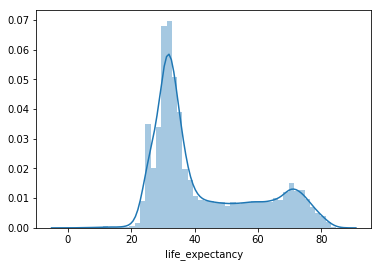

In [302]:
sns.distplot(gapminder.life_expectancy.dropna())

**Question 4.2** 
En réfléchissant deux minutes, cet histogramme a-t-il vraiment un sens ? Ou du moins ne peut-on pas faire un peu mieux ? Tracer par exemple les histogrammes pour le 19e siècle (les années <1900) et pour le 20e siècle (donc les années supérieures à 1899 et inférieures à 2000), et encore pour le 21e (les années >1999)

Pour cela, vous devrez filtrer les données. 

Voici pour le second item : 
```
idx = (gapminder['year']>=1900) & (gapminder['year']<2000)
gapminder[idx]
```

Si vous utilisez seaborn, celui-ci n'aime pas les données manquantes, et vous utiliserez un `dropna()` au passage.

/usr/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


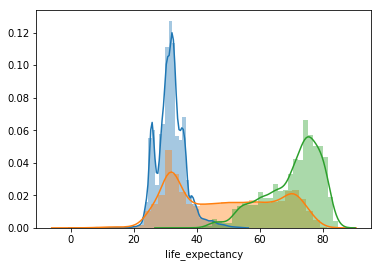

In [315]:
sns.distplot(gapminder[gapminder['year']<1900].life_expectancy.dropna())
idx = (gapminder['year']>=1900) & (gapminder['year']<2000)
sns.distplot(gapminder[idx].life_expectancy.dropna())
sns.distplot(gapminder[gapminder['year']>1999].life_expectancy.dropna())

- Une autre possibilité est de créer une colonne catégorielle, disons siecle, permettant de définir des intervalles (les siècles, donc) à partie de la colonne `year`. Pour cela, vous utiliserez la commande `pd.cut()` [doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html)

In [342]:
gapminder['siecle'] = pd.cut(gapminder['year'], [1799, 1899, 1999, 2100], labels=['19e', '20e', '21e' ])

In [ ]:
gapminder['siecle'] = pd.cut(gapminder['year'], [___, ___, ___, ___], labels=[__, __, __ ])

Vous pourrez ensuite utiliser `sns.distplot` en reprenant et adaptant ce bout de code
```
groups = iris.dropna().groupby('species')
for l,group in groups:
    sns.distplot(group['petal_length'], hist=True, label=l)
plt.legend()
```

/usr/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


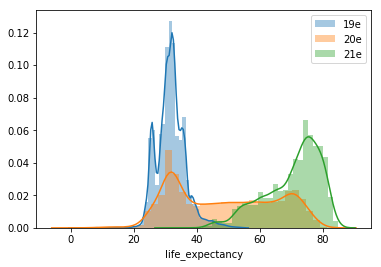

In [349]:
groups = gapminder.dropna().groupby('siecle')
for l,group in groups:
    sns.distplot(group['life_expectancy'], hist=True, label=l)
plt.legend()

**Question 4.3** On va maintenant regrouper les données par années et chercher à tracer l'évolution de l'espérance de vie moyenne en fonction du temps. 

- Utiliser la commande `.groupby()` pour regrouper par années, en créant une variable `gapminder_agg`, puis calculer la moyenne de `life_expectancy` sur ces groupes

In [ ]:
# Group gapminder: gapminder_agg
gapminder_agg = gapminder.____('____')['___'].____()

plt.figure(figsize=(10,6))

# Create a line plot of life expectancy per year
gapminder_agg.plot()

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

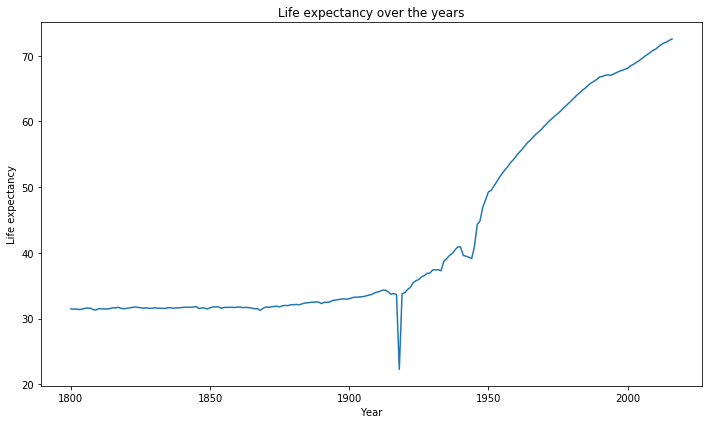

In [350]:
# Group gapminder: gapminder_agg
gapminder_agg = gapminder.groupby('year')['life_expectancy'].mean()

plt.figure(figsize=(10,6))

# Create a line plot of life expectancy per year
gapminder_agg.plot()

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

On peut donc voir l'évolution de la poulation mondiale et constater que l'expérance de vie moyenne mondiale dépasse maintenant les 70 ans ! Réponse à la question de l'introduction. A quoi sont liés les deux décrochements que l'on peut observer sur la courbe ?      

## Plus loin - Complétons encore ces données

Ceci n'est pas complètement juste dans la mesure où nous moyennons les espérances de vies par pays, alors que les pays en question n'ont pas les mêmes populations... 

On va essayer de faire mieux, ou au moins plus scientifique. Pour cela on peut compléter nos données avec des données récuérées sur le site gapminder.


**Question 5.1**
- Lire le fichier `population_total.csv` dans une variable `population`,
- regarder quelles sont les caractéristiques de ces données `.head`, `.columns`, etc
- tidyfier le résultat en conservant la variable identificatrice `country`, en utilisant `pd.melt` comme précédemment,
- renommer les colonnes en 'country', 'year', 'population'

In [ ]:
population = ## FILL HERE ##
population = pd.melt(frame=____, id_vars=['___'])
population.columns = ## FILL HERE ##
population.head()

In [351]:
population = pd.read_csv("population_total.csv")
population = pd.melt(frame=population, id_vars=['country'])
population.columns = ['country', 'year', 'population'] 
population.head()

,country,year,population
0,Afghanistan,1800,3280000
1,Albania,1800,400000
2,Algeria,1800,2500000
3,Andorra,1800,2650
4,Angola,1800,1570000


- Contrôler le type des variables. 
- Si le type de `year` est incorect, le convertir en `int64` (tpe numpy)

In [352]:
population.dtypes

country       object
year          object
population     int64
dtype: object

In [ ]:
population.year = population.year.astype(____)

In [63]:
population.year = population.year.astype(np.int64)

**Question 5.2** Combinons maintenant les données de gapminder et de population en mergeant les deux tables (méthode `pd.merge`), en prenant les colonnes 'country', 'year' comme référence. Vous ferez donc un merge `on` les colonnes précisées

In [ ]:
gap = pd.merge(_____, ____, on=['___','___'])
gap = gap.dropna()

In [82]:
gap = pd.merge(gapminder, population, on=['country','year'])
gap = gap.dropna()

**Question 5.3** Puisqu'on en est là, il est sans doute intéressant de regarder quelle est l'évolution de la population mondiale. Pour ce faire, regrouper `groupby` selon la colonne `year`, extraire la colonne `population` et aggéger le résultat selon une somme. 

In [ ]:
world_pop = gap.groupby('___')['___'].___()
world_pop.plot()

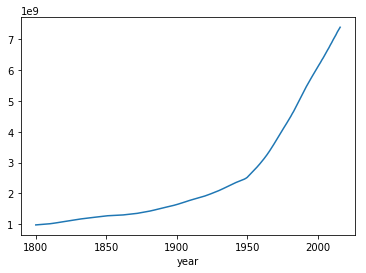

In [88]:
world_pop = gap.groupby('year')['population'].sum()
world_pop.plot()

**Question 5.4** Afin d'améliorer notre estimée de l'évolution de l'espérance de vie, nous allons pondérer les poids de chaque pays par sa population ramenée à la polutation mondiale, l'année considérée. 
Pour cela, nous allons créer une colonne `pop_pct` (pourcentage de la poulation), puis une colonne `le_pct` qui sera `life_expectancy*pop_pct`

- Pour créer la colonne `pop_pct`, vous utiliserez la méthode `.apply()` qui permet d'appliquer une fonction aux lignes ou colonne du dataframe. Si `x` est la ligne courante, `x['population']` et `world_pop[x['year']]` contiendront les données utiles. Vous pouvez éventuellement utiliser une fonction anonyme `lambda`
- Regrouper les données par années, extraire la colonne `le_pct` et sommer (ce qui calcule la moyenne pondérée). Représenter  graphiquement le résultat et comparez le à `gapminder_agg.plot()`. 

In [ ]:
gap['pop_pct'] = gap.apply(____, axis=__)
gap['le_pct'] = gap['life_expectancy']*gap['pop_pct']

In [92]:
gap['pop_pct'] = gap.apply(lambda x: x['population']/world_pop[x['year']], axis=1)

In [97]:
gap['le_pct'] = gap['life_expectancy']*gap['pop_pct']

In [98]:
gap.head(10)

,country,year,life_expectancy,population,pop_pct,le_pct
0,Afghanistan,1800,28.21,3280000,0.003344,0.094347
3,Albania,1800,35.40,400000,0.000408,0.014438
6,Algeria,1800,28.82,2500000,0.002549,0.073465
12,Angola,1800,26.98,1570000,0.001601,0.043191
15,Antigua and Barbuda,1800,33.54,37000,0.000038,0.001265
18,Argentina,1800,33.20,534000,0.000544,0.018077
21,Armenia,1800,34.00,413000,0.000421,0.014318
24,Australia,1800,34.05,200000,0.000204,0.006944
27,Austria,1800,34.40,3000000,0.003059,0.105227
30,Azerbaijan,1800,29.17,880000,0.000897,0.026174


In [ ]:
%matplotlib inline
plt.figure(figsize=(14,6))
gap.groupby('____')['____'].___().___()
gapminder_agg.plot()
plt.grid()
#plt.axis([1900, 2000, 20, 75])

[1900, 2000, 20, 75]

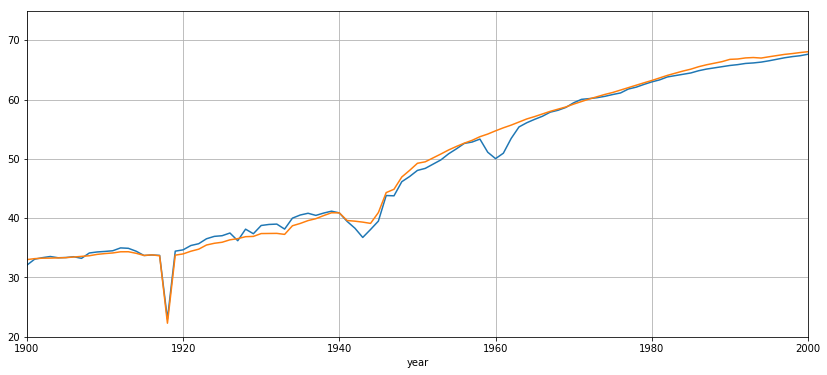

In [127]:
%matplotlib inline
plt.figure(figsize=(14,6))
gap.groupby('year')['le_pct'].sum().plot()
gapminder_agg.plot()
plt.grid()
#plt.axis([1900, 2000, 20, 75])

- On peut se demander comment interpréter la chute d'espérance de vie qui apparaît aux alentours des années 60, et qui n'est pas présente (masquée) lorsque l'on fait la moyenne sur tous les pays sans pondération par leurs poulation. Ceci pourrait s'interpréter comme une chute de l'espérance de vie dans un petit groupe de pays à forte population. Une idée ? 

Pour comprendre ce qui s'est passé, extraire par exemple la Chine -- il faut donc sélectionner tous les indices tels que `gap['country']=='China'` et tracer `life_expectancy` en fonction de `year` 

In [ ]:
gap[____].plot(x='___', y='_____')
plt.axis([1900, 2000, 20, 75])

[1900, 2000, 20, 75]

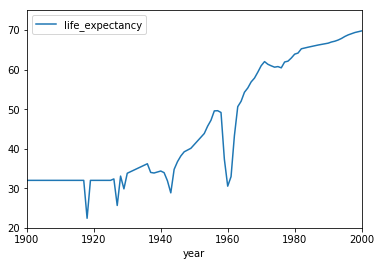

In [131]:
gap[gap['country']=='China'].plot(x='year', y='life_expectancy')
plt.axis([1900, 2000, 20, 75])

Enfin, si vous voulez faire des hypothèses sur le pourquoi, sans doute que ceci sera pertinent : 
[Le grand bond en avant](https://fr.wikipedia.org/wiki/Grand_Bond_en_avant), ainsi que cette [figure](https://fr.wikipedia.org/wiki/Démographie_de_la_Chine#/media/Fichier:Birth_rate_in_China_fr.jpg)

**Question 5.5** Pour terminer, nous allons prendre en compte le revenu par habitant ; l'ajouer dans notre tableau de données, effectuer quelques visualisations et mesures de corrélations. 

- Lire le fichier `income_per_person_gdppercapita_ppp_inflation_adjusted.csv` dans une variable `income`
- Tidyfier le résultat de manière similaire à ce que nous avons fait pour `population`
- Renommer les colonnes en 'country', 'year', 'income'
- Vous assurer que `year` soit bien de type entier

In [ ]:
income = ## FILL HERE ###
income = pd.melt(_____, ___)
income.columns = ['country', 'year', 'income'] 
income.year = ## FILL HERE ###
income.head()

In [136]:
income = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
income = pd.melt(frame=income, id_vars=['country'])
income.columns = ['country', 'year', 'income'] 
income.year = income.year.astype(np.int64)
income.head()

,country,year,income
0,Afghanistan,1800,603
1,Albania,1800,667
2,Algeria,1800,715
3,Andorra,1800,1200
4,Angola,1800,618


- Merger la table `income` avec `gap`

In [ ]:
gap2 = pd.merge(___, ___, ___)
gap2 = gap2.dropna()

In [376]:
gap2 = pd.merge(gap, income, on=['country','year'])
gap2 = gap2.dropna()

In [377]:
gap2.head()

,country,year,life_expectancy,population,pop_pct,le_pct,income
0,Afghanistan,1800,28.21,3280000,0.003344,0.094347,603
1,Albania,1800,35.40,400000,0.000408,0.014438,667
2,Algeria,1800,28.82,2500000,0.002549,0.073465,715
3,Angola,1800,26.98,1570000,0.001601,0.043191,618
4,Antigua and Barbuda,1800,33.54,37000,0.000038,0.001265,757


- Examiner quelles sont les corrélations entre toutes les variables de `gap2`. Avec quelles variables `life_expectancy`  semble-telle liée ?  Vous utiliserez la méthode `.corr()` et pourrez faire une jolie visualisation avec `sns.heatmap`. 

In [141]:
gap2.corr()

,year,life_expectancy,population,pop_pct,le_pct,income
year,1.000000,0.767500,0.126469,-0.001090,0.071648,0.405143
life_expectancy,0.767500,1.000000,0.119950,-0.004895,0.089886,0.567425
population,0.126469,0.119950,1.000000,0.798894,0.942240,0.034240
pop_pct,-0.001090,-0.004895,0.798894,1.000000,0.930744,-0.017226
le_pct,0.071648,0.089886,0.942240,0.930744,1.000000,0.023335
income,0.405143,0.567425,0.034240,-0.017226,0.023335,1.000000


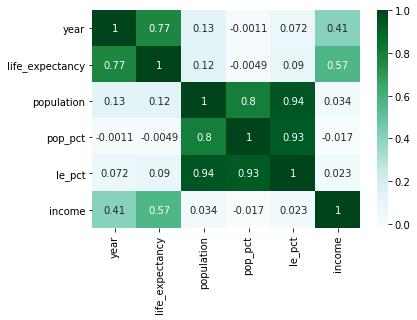

In [150]:
sns.heatmap(gap2.corr(), annot=True, cmap="BuGn")

- Enfin, nous allons nous intéresser à la variable `income`. 
    - Tracez l'histogramme de cette variable (par exemple avec `sns.distplot`)
    - Examinez le nuage de points entre `income` et `life_expectancy` (par exemple avec `sns.scatterplot(data=gap2, ....`) 
- Transformez cette variable en une variable `log_income` et reprendre les deux visualisations précédentes, auxquelles vous ajouterez un boxplot et un lmplot (recherche d'une tendance linéaire). Quelle est la corrélation entre la variable `log_income` et `life_expectancy`. Que pensez-vous de cette transformation ?           

/usr/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


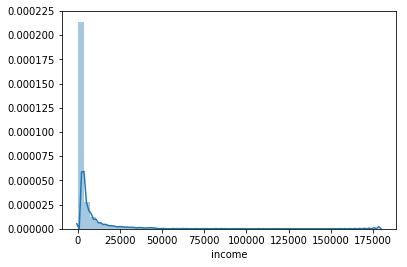

In [247]:
sns.distplot(gap2['income'])

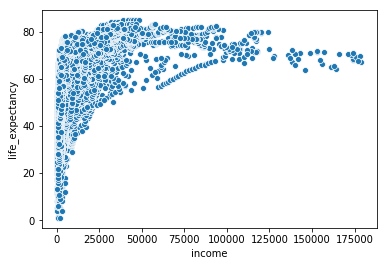

In [242]:
sns.scatterplot(data=gap2, x='income', y='life_expectancy')

In [378]:
gap2['log_income'] =  np.log(gap2['income'])

/usr/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


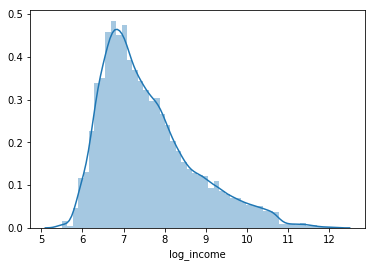

In [354]:
sns.distplot(gap2['log_income'])

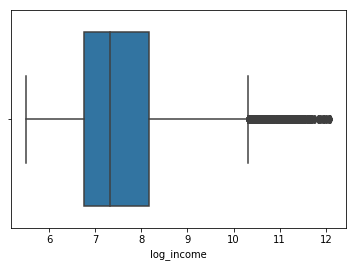

In [355]:
sns.boxplot(gap2['log_income'])

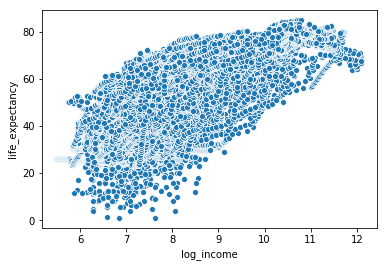

In [356]:
sns.scatterplot(x='log_income', y='life_expectancy', data=gap2)

/usr/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


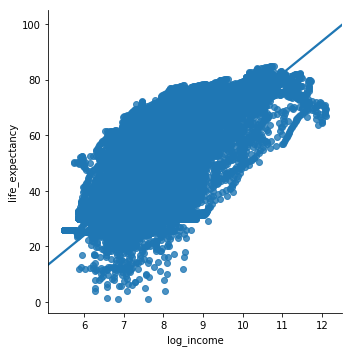

In [357]:
sns.lmplot(x='log_income', y='life_expectancy', data=gap2)

In [358]:
gap2.corr()

,year,life_expectancy,population,pop_pct,le_pct,income,pred,year2,lincome,log_income
year,1.000000,0.767500,0.126469,-0.001090,0.071648,0.405143,0.834757,0.999892,0.639177,0.639177
life_expectancy,0.767500,1.000000,0.119950,-0.004895,0.089886,0.567425,0.919430,0.772928,0.809856,0.809856
population,0.126469,0.119950,1.000000,0.798894,0.942240,0.034240,0.130461,0.127392,0.064075,0.064075
pop_pct,-0.001090,-0.004895,0.798894,1.000000,0.930744,-0.017226,-0.000028,-0.001097,-0.018928,-0.018928
le_pct,0.071648,0.089886,0.942240,0.930744,1.000000,0.023335,0.085467,0.072136,0.051069,0.051069
income,0.405143,0.567425,0.034240,-0.017226,0.023335,1.000000,0.617149,0.408531,0.733489,0.733489
pred,0.834757,0.919430,0.130461,-0.000028,0.085467,0.617149,1.000000,0.840660,0.880824,0.880824
year2,0.999892,0.772928,0.127392,-0.001097,0.072136,0.408531,0.840660,1.000000,0.641731,0.641731
lincome,0.639177,0.809856,0.064075,-0.018928,0.051069,0.733489,0.880824,0.641731,1.000000,1.000000
log_income,0.639177,0.809856,0.064075,-0.018928,0.051069,0.733489,0.880824,0.641731,1.000000,1.000000


FIN